# Housekeeping

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Gathering and Calculating Bollinger Bands

In [55]:
TICKER = 'SPY'
BB_LEN = 20
DEVS = 2
LOOKBACK = 1000

def get_data(ticker=TICKER, lookback=LOOKBACK):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_bollinger_bands(df,devs=DEVS,bb_len=BB_LEN):
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    #Get the standard deviation for the close prices over the given period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs*df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs*df['BB_STD'])

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label = 'Close Price', color = 'Blue')
    plt.plot(df['Upper_Band'], label = 'Upper Band', color = 'Orange')
    plt.plot(df['Lower_Band'], label = 'Lower Band', color = 'Orange')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df.dropna()

# Creating and Testing Strategy

In [ ]:
def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(
        df['Close'] > df['Upper_Band'], 1, 
        np.where(df['Close'] < df['Lower_Band'], -1, 0)
        )
    
    df['Strategy'] = df['Strategy'].shift(1)
    
    return df

def test_strategy(df):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    return df

def return_summary(df, TICKER, LOOKBACK):
    asset_return = df['Asset_Returns'].iloc[-1] * 100
    strategy_return = df['Strategy_Returns'].iloc[-1] * 100
    print(f"{TICKER} Buy & Hold Return: {asset_return:.2f}%")
    print(f"{TICKER} Bollinger Bands Strategy Return: {strategy_return:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(df['Asset_Returns'], label=f'{TICKER} Cumulative Returns', color = 'red')
    plt.plot(df['Strategy_Returns'], label = f' {TICKER} Strategy Returns', color = 'navy')
    plt.legend()
    plt.title(f'{TICKER} RSI Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    return df

# Running the Code

C:\Users\EWD\AppData\Local\Temp\ipykernel_21112\760654323.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker)
[*********************100%***********************]  1 of 1 completed


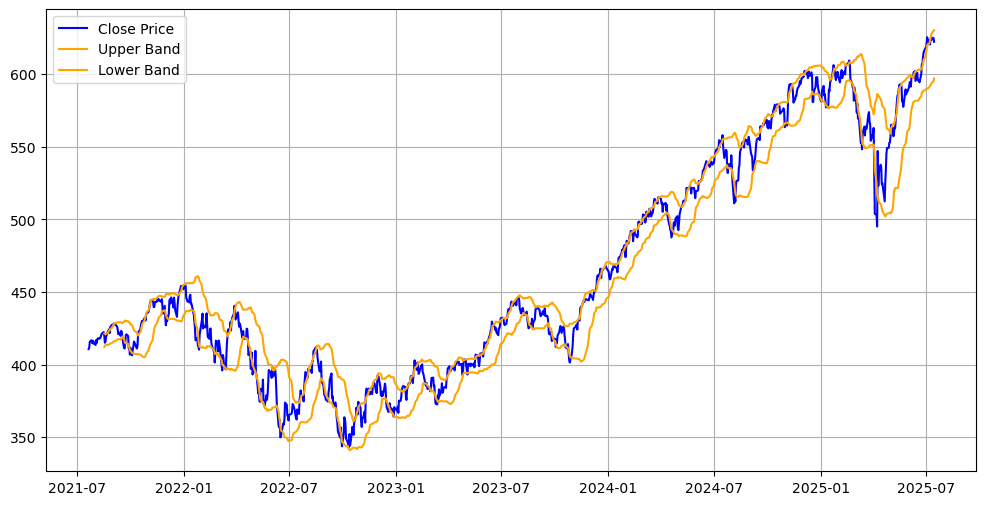

SPY Buy & Hold Return: 48.27%
SPY Bollinger Bands Strategy Return: -5.29%


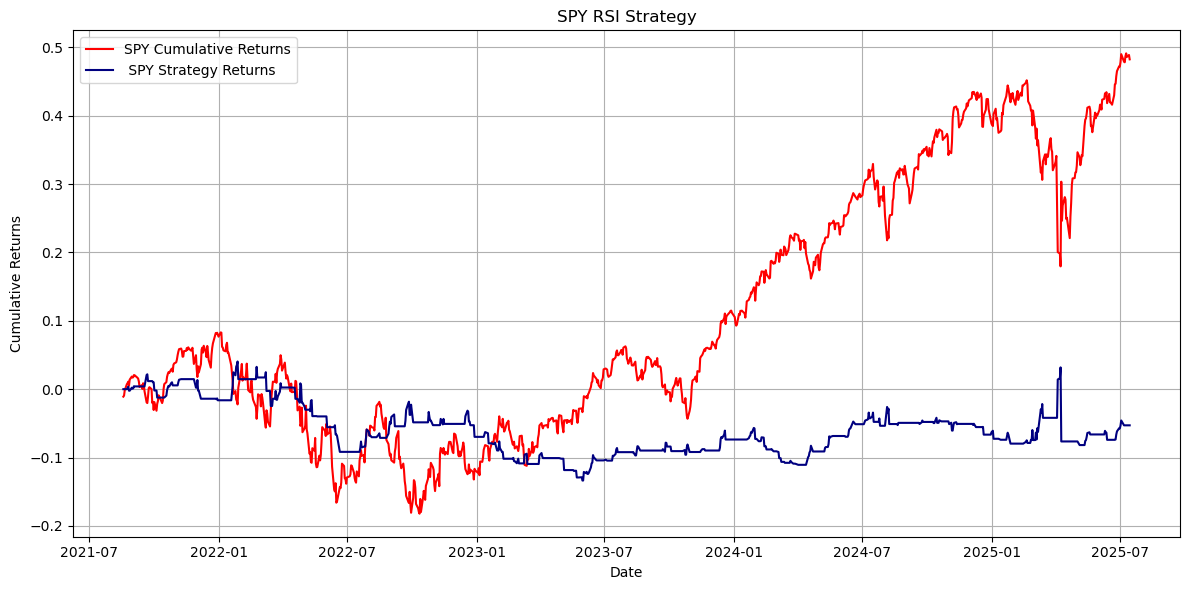

Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper_Band,Lower_Band,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
2021-08-17,419.611938,420.481310,416.597428,419.800919,92673900,416.766083,3.101996,421.419076,412.113089,NaN,NaN,NaN
2021-08-18,415.019257,420.169446,414.773580,418.591305,89351900,416.984848,2.785667,421.163349,412.806347,0.0,-0.010945,0.000000
2021-08-19,415.661804,416.871415,412.127563,412.269306,92812200,417.192741,2.495096,420.935386,413.450097,0.0,-0.009414,0.000000
2021-08-20,418.969330,419.300081,415.520134,416.011545,72008700,417.354333,2.500535,421.105136,413.603531,0.0,-0.001531,0.000000
2021-08-23,422.654785,423.571423,419.044929,420.670307,54973000,417.649173,2.760639,421.790131,413.508215,0.0,0.007252,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-09,624.059998,624.719971,620.909973,622.770020,66113300,608.596600,10.738760,624.704740,592.488461,0.0,0.487231,-0.052914
2025-07-10,625.820007,626.869995,623.010010,624.200012,57529000,609.822482,11.249520,626.696763,592.948202,0.0,0.491426,-0.052914
2025-07-11,623.619995,624.859985,621.530029,622.739990,63670200,611.024109,11.381472,628.096316,593.951901,0.0,0.486183,-0.052914


In [56]:
def main():
    df = get_data()
    df = add_bollinger_bands(df)
    df = add_strategy(df)
    df = test_strategy(df)
    DF = return_summary(df, TICKER, LOOKBACK)
    return df

main()